## Decision Tree : 

Genelde iki şeçenekli classifiaction algoritmalarında kullanılır. Regression da da kullanılır. İlk karar yaprağına Rot node denir. Diğerlerine ise Decision node denir. Artık cevap kısmına geldiğimiz yere ise Leaf node denir. Bunların hepsine ise Sub-Tree denir. 

Çalışma prensibi ise şöyledir. İf else durmunu benzer. Örneğin havanın durumuna göre dışarı çıkıp çıkmayacağımıza karar vereceğiz. İlk önce dışarı bakarız hava güneşili mi bulutlu mu yağmurlu mu diye, sonra hava bulutluysa çıkacağımıza karar verdik, eğer hava yağmurluysa bu sefer yağmur şiddetli mi değil mi ona bakarız. eğer yağmur şiddetliyse çıkmayız, eğer yağmur az yağıyorsa çıkarız, eğer hava güneşli ise sıcaklık durumuna bakarız, eğer çok sıcaksa çıkmayız, normal sıcaklık varsa çıkarız. burda ki her sorumuz bir yapraktır. son sorularımız final decision treelerdir.

Bunları şu şekilde yapar : algoritma çalışmaya başlarken şunu yapar. Örneğin elimizde 2 class olsun. Bu classları en iyi hangi futureden, en iyi hangi değerden ayırırım ona bakar. sonra tüm target üzerinden tüm değerleri ayırıyor ve hepsine bakıyor. future ile target arasında en iyi ayrımın olduğu root node karar veriyor. root node üzerinden diğer yaprakları oluşturmaktadır.

Örneğin elimizde pozitif ve negatif değerleri olsun. en iyi öyle yerden bölmeli ki en güzel olasılıkla tahminde bulunsun. x1 i 1 den küçük olarak ayırırsam x1 in tüm değerleri pure olur yani tüm değerlerini kapsar, x2 içinse 1 büyük, 2 den küçükse değerlerin çoğunun pure olduğunu gördü ama tamamı olmadı, bu sefer x2 > 1.8 dedi ve tekrardan değerleri kapsayıp kapsamadığına baktı ve değerlerin büyük kısmının pure olduğunu gördü. bunu train datasında yaptı. test datasında train datasında yaptığı bölme işleminin aynısını uygulayacaktır. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()
# penguenlere ait bir dataseti.
# yaşadıkları ada, gaga uzunlukları, gaga genişlikleri, cinsiyetleri var. 

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
df[df["sex"]== "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [9]:
df[df.species =="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [10]:
df.loc[336, "sex"] = "MALE"
df.loc[336, "sex"]

'MALE'

In [11]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

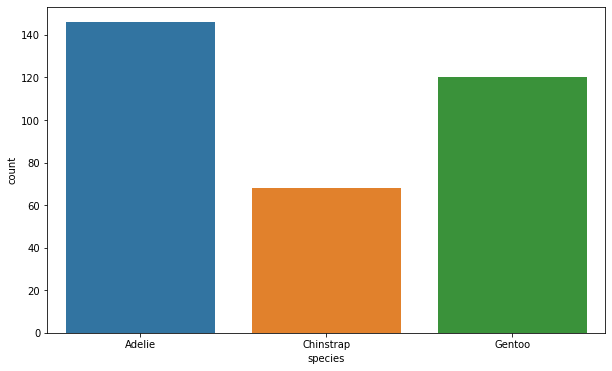

In [12]:
sns.countplot(x="species", data = df);

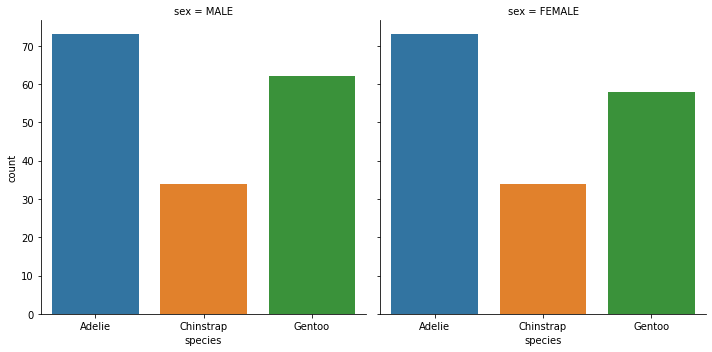

In [13]:
sns.catplot(x='species', data=df, kind='count',col='sex');

In [14]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [15]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


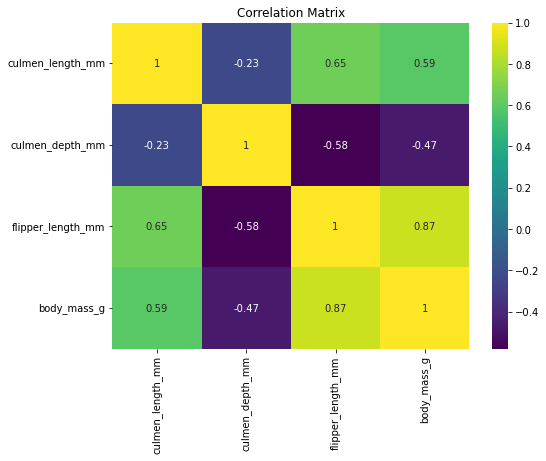

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

In [18]:
df.head()
# species target olacak, biz türleri tahmin edeceğiz. 

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [19]:
X = df.drop("species", axis=1)
y = df["species"]

X = pd.get_dummies(data = X, columns = ["island", "sex"], drop_first = True)

### Train | Test Split : 

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Modelling : 

Tree Base Modellerde scale işlemi tavsiye edilmez. o yüzden yapmadık.

In [23]:
from sklearn.tree import DecisionTreeClassifier
# target categoric olduğu için Classifier yaptık.

In [24]:
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Metrics : 

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [26]:
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  0  0]
 [ 3 20  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        41
   Chinstrap       1.00      0.87      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.98      0.96      0.96       101
weighted avg       0.97      0.97      0.97       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [27]:
y_pred = dt_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  0  0]
 [ 3 20  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        41
   Chinstrap       1.00      0.87      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.98      0.96      0.96       101
weighted avg       0.97      0.97      0.97       101



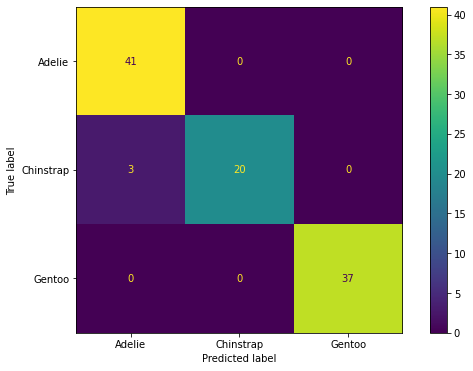

In [29]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt_model, X_test, y_test);

# Adelie den 44 tane tahmin yapmış, 41 tanesi doğru, 3 tanesini Chinstrap olarak bilmiş, 
# Chinstrap tan 20 tane tahmin yapmış ve hepsini doğru bilmiş,
# Gentto dan 37 tane tahmin yapmış ve hepsini bilmiş.

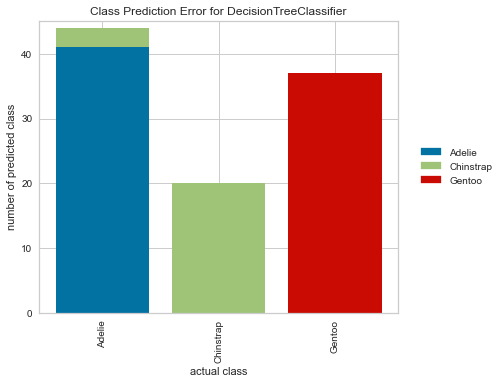

In [31]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(dt_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();
# yukarıda ki plot_confusion matrixi yellowbrick ile de alabiliriz.

### Cross Validate ile kontroller : 

In [32]:
from sklearn.model_selection import cross_val_score, cross_validate

model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# Multiclasslar için : 
# eğer tüm sınıflar dengeli ise skorlar birbirlerine yakınsa micro skora(accuracy) bakarız.
# eğer data da dengesizlik varsa ımbalanced durumu varsa macro,
# eğer data da dengesizlik var ama skor sayısı fazla olan gözlemlere göre sonuç almak istersek ise weighted yapılır. 

test_accuracy           0.965942
test_precision_micro    0.965942
test_recall_micro       0.965942
test_f1_micro           0.965942
dtype: float64

### Feature İmportance : 

In [33]:
dt_model.feature_importances_
# her futureye karşılık gelen önem katsayısıdır. yani sırasıyla hangi future target için daha önemli onu gösterir. 

array([0.33369511, 0.05366774, 0.542054  , 0.00239775, 0.0681854 ,
       0.        , 0.        ])

In [35]:
# futurelerin önem katsayılarını daha iyi görmek adına dataframeye çevirdik :

df_f_i = pd.DataFrame(index=X.columns, data = dt_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

# target değerlerini tahmin etmede en fazla yüzdeye sahip futuremiz flipper_length_mm olduğu görülmüştür. 

,Feature Importance
island_Torgersen,0.000000
sex_MALE,0.000000
body_mass_g,0.002398
culmen_depth_mm,0.053668
island_Dream,0.068185
culmen_length_mm,0.333695
flipper_length_mm,0.542054


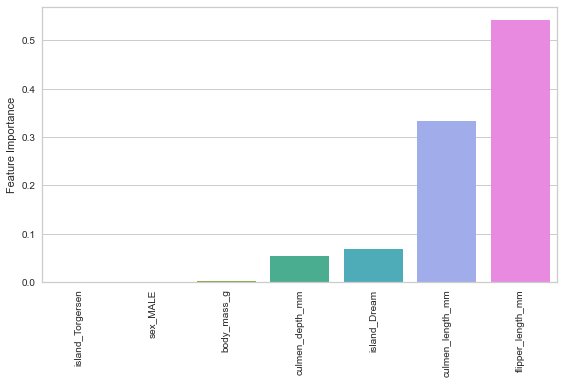

In [36]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
# futurelerin önem yüzdelerini grafiksel olarak gösterdik.

### Decision Tree için Uyarı !!! : 

Yukarıda da görüldüğü üzere bazen bazı futureler targeti tahmin etmede oldukça yüksek yüzdeye sahip olmaktadır. bu durum bizi overfitng durumuna götürebilmektedir. Bu datamızda flipper_length_mm futuresi tek başına targeti tahminde % 55 lik paya sahip olduğu ortaya çıktı. Decision tree için bu durum bir handikap ortaya çıkarmaktadır. çünkü future targeti tahminde yüksek yüzdeye sahipse diğer futurelere başvurmaz ve bu durum overfiting ortaya çıkarabilir. Diğer futureleri önemsizleştirmektedir.

Çok önemli futurelerde bizi ovrfitinge götürebilmektedir. 

### En önemli yüzdeye sahip futuremizi düşürüp te skorlarımıza bakalım : 

In [37]:
X2 = X.drop(columns = ["flipper_length_mm"]) 
# yeni dataframe oluşturduk ve en önemli futuremizi düşürdük.

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)
dt_model2 = DecisionTreeClassifier(random_state=101)
dt_model2.fit(X_train2, y_train2) 

DecisionTreeClassifier(random_state=101)

In [39]:
eval_metric(dt_model2, X_train2, y_train2, X_test2, y_test2)

# skorlar mükemmelleşti.

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [40]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# skorları kontrol ettik.

test_accuracy           0.991486
test_precision_micro    0.991486
test_recall_micro       0.991486
test_f1_micro           0.991486
dtype: float64

### sonuç : 

Decision_Tree algoritması için en önemli yüzdelik öneme sahip katsayıya muhakkak bakılmalı. eğer yüzdesi oldukça fazla ise düşürülüp bir daha skorlarına bakılmalıdır. biz düşürüp baktık ve skorlarda ciddi bir artış oldu.

### Her bir target değerimiz için cross validate skorlarına bakabiliriz : 

In [46]:
from sklearn.metrics import make_scorer

scoring = {'precision-Adelie': make_scorer(precision_score,  average=None, labels=["Adelie"]),
           'recall-Adelie': make_scorer(recall_score, average=None, labels =["Adelie"]),
           'f1-Adelie': make_scorer(f1_score, average=None, labels = ["Adelie"]),
          
          'precision-Chinstrap': make_scorer(precision_score,  average=None, labels=["Chinstrap"]),
          'recall-Chinstrap': make_scorer(recall_score, average=None, labels=["Chinstrap"]),
          'f1-Chinstrap': make_scorer(f1_score, average=None, labels=["Chinstrap"]),
          
          
          'precision-Gentoo': make_scorer(precision_score,  average=None, labels=["Gentoo"]),
          'recall-Gentoo': make_scorer(recall_score, average=None, labels = ["Gentoo"]),
          'f1-Gentoo': make_scorer(f1_score, average=None, labels = ["Gentoo"]),
          
          }

model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_test2, y_test2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
print("Test datamız için classlara göre skorlar : ")
print(df_scores.mean()[2:])
print("..........")

model2 = DecisionTreeClassifier(max_depth=None, random_state=101)

scores2 = cross_validate(model2, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores2 = pd.DataFrame(scores2, index = range(1, 11))
print("Train datamız için classlara göre skorlar : ")
print(df_scores2.mean()[2:])

Test datamız için classlara göre skorlar : 
test_precision-Adelie       0.920000
test_recall-Adelie          0.975000
test_f1-Adelie              0.941270
test_precision-Chinstrap    0.933333
test_recall-Chinstrap       0.850000
test_f1-Chinstrap           0.866667
test_precision-Gentoo       0.975000
test_recall-Gentoo          0.950000
test_f1-Gentoo              0.957143
dtype: float64
..........
Train datamız için classlara göre skorlar : 
test_precision-Adelie       1.000000
test_recall-Adelie          0.980909
test_f1-Adelie              0.989975
test_precision-Chinstrap    0.983333
test_recall-Chinstrap       1.000000
test_f1-Chinstrap           0.990909
test_precision-Gentoo       0.988889
test_recall-Gentoo          1.000000
test_f1-Gentoo              0.994118
dtype: float64


## Parametreler : 

### Visualize the Tree : 

In [48]:
from sklearn.tree import plot_tree
# ağaç çalışmasının grafiksel gösterimini çizdirir.

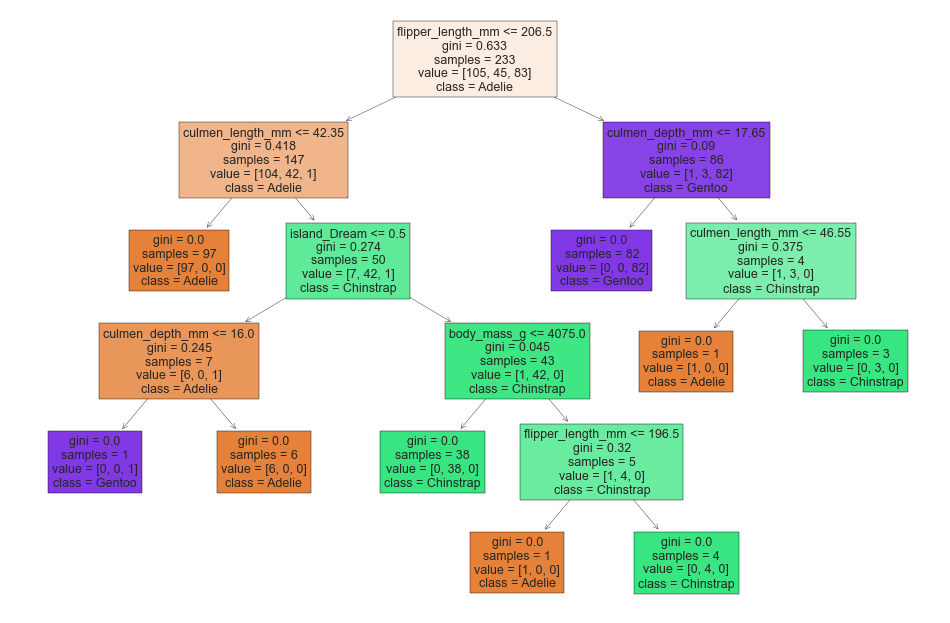

In [50]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=df.species.unique());
# bu daha anlaşılır. hangi classa ait olduğunu bana göstermesi için unique değerlerini atamasını istedik.

### Decision Tree için en önemli parametreler : 

#### 1-) max_depth : 
Tree base modellerde en önemli parametredir. ağacın ineceği derinliktir. ağacın kaç adet dallanacağına karar veren parametredir. örneğin 2 sayısını verdik, 3 e kadar dal yapar.  default parametresi None dir. bütün sınıfları ayırana kadar dallanmaya devam etsin istersek None değeri veririz.  ama bu train seti için yüzde yüz doğru skora ulaştırabilir ama test için aynısı çok geçerli değildir.  Bu da overfiting tehlikesi getirebilmektedir. 

#### 2-) min sample spilt : 
Bir yaprağın bölünme şartıdır. Yaprağın içine alacağı gözlem sayılarını belirler. eğer min_sample splite verdiğimiz değeri ayarlayamassak yaprak bölünemez. dallanmayı kontrol etmeye yardım eder. 

#### 3-) min samples leaf : 
Bir yaprağın yaprak olarak kabul edilebilmesi için o yaprakta bulunması gereken gözlem sayısıdır. 

#### 4-) max_leaf_nodes : 
En sonda kalan yaprak sayısını ayarlamaktadır. 

#### 5-) splitter : 
Default best, diğeri randomdur. best en güzel soru ile datayı ayır demektir, random ise rastgele soru sorar. ve sonunda en kuvvetli futureyi seçer.  best, targeti tahminde en yüksek katsayıya sahip futureyi seçerek ilk yaprağı başlatır. 

#### 6-) max_features : 
None değerindeyken datada ki en yüksek katsayıya sahip futureyi seçip onun üzerinden ayrım yapmaya başlar. yani her yaprak için sırasıyla gelen her gözleme ne kadar future varsa onun üzerinden ayrım yapar. max_features sayısına göre future seçer ve her gözlem için en iyi future seçer ve ona göre ayrım yapar. 

#### 7-) criterion : 
Bölme kriteridir. Gini ve entropy olarak 2 ye ayrılır. data da ne kadar farklı değer varsa gini ve entropy katsayısı o kadar artar. gini ve entropy 0 ise tüm gözlemlerin aynı sınıfa ait olduğunu göstermektedir. 

gini tahminleri olasılık üzerine hesaplarken, entropy log 2 tabanı üzerinden hesaplar. 

### GridSearchCV Best params : 

In [53]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state=101)
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7,8,9],
              # ayrım yapmak için : 
              # auto demek future sayısının karekökünü al demek, None demek ne kadar future sayısı varsa onu al demek,
              # log2 demek ne kadar future varsa onun 2 tabanında logaritmasını alır ve çıkarsa o değeri alır.
              
              "max_depth": [None, 2, 3, 4, 5,6, 7],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "min_samples_split": [2, 3, 5, 6, 7, 8, 9]}
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='recall_micro',
                          cv=10,
                          n_jobs = -1)

grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='recall_micro')

In [54]:
eval_metric(grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [55]:
grid_model.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

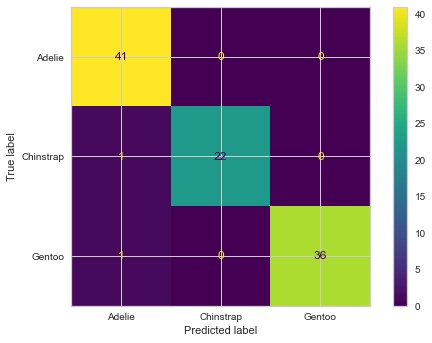

In [77]:
plot_confusion_matrix(grid_model, X_test2, y_test2);
# sadece Adelie de 2 tane hata yapmış.

### Final Model : 

In [61]:
X1 = X.drop("flipper_length_mm", axis=1)

In [62]:
final_model = DecisionTreeClassifier(max_depth=None, max_features=None, min_samples_leaf=1, 
                                     min_samples_split=2,splitter="best", random_state=101)

final_model.fit(X1, y)

DecisionTreeClassifier(random_state=101)

In [63]:
y_pred = final_model.predict(X1)

data = pd.concat([X1.head(15), y.head(15)], axis=1)

In [70]:
data["tahmin"] = y_pred[0:15]

In [71]:
data

,culmen_length_mm,culmen_depth_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE,species,tahmin
0,39.1,18.7,3750.0,0,1,1,Adelie,Adelie
1,39.5,17.4,3800.0,0,1,0,Adelie,Adelie
2,40.3,18.0,3250.0,0,1,0,Adelie,Adelie
4,36.7,19.3,3450.0,0,1,0,Adelie,Adelie
5,39.3,20.6,3650.0,0,1,1,Adelie,Adelie
6,38.9,17.8,3625.0,0,1,0,Adelie,Adelie
7,39.2,19.6,4675.0,0,1,1,Adelie,Adelie
12,41.1,17.6,3200.0,0,1,0,Adelie,Adelie
13,38.6,21.2,3800.0,0,1,1,Adelie,Adelie
14,34.6,21.1,4400.0,0,1,1,Adelie,Adelie
